
<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/11_Embeddings_Vector_Space.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 🔢 Tokenizacja i Embeddings (Jak matematyka widzi słowa?)

Komputery są świetne w liczeniu, ale beznadziejne w czytaniu.
Nie rozumieją słowa "Król". Widzą tylko ciąg zer i jedynek.

Jak zamienić słowa na liczby, żeby zachować ich **znaczenie**?

1.  **Podejście Stare (One-Hot / Bag of Words):**
    *   Jabłko = [1, 0, 0]
    *   Gruszka = [0, 1, 0]
    *   **Problem:** Dla komputera te dwa owoce są tak samo różne, jak Jabłko i Samochód. Nie widzi podobieństwa.

2.  **Podejście Nowe (Embeddings / Wektory):**
    *   Każde słowo to punkt na mapie (współrzędne).
    *   Słowa o podobnym znaczeniu leżą **blisko siebie**.
    *   Możemy na nich robić matematykę!

W tym notatniku zrobimy symulację "Mózgu AI" w uproszczeniu (2D), żeby zobaczyć słynne równanie:
$$ Król - Mężczyzna + Kobieta = ? $$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. SYMULACJA EMBEDDINGS (Wektory 2D)
# W prawdziwym GPT wektor ma np. 1536 wymiarów. My zrobimy 2, żeby dało się to narysować.
# Oś X: "Status Społeczny" (0 = Zwykły, 1 = Królewski)
# Oś Y: "Płeć" (0 = Męska, 1 = Żeńska)

word_embeddings = {
    # Słowa "Ludzkie"
    "Man":      np.array([0.1, 0.1]),
    "Woman":    np.array([0.1, 0.9]),
    "King":     np.array([0.9, 0.1]),
    "Queen":    np.array([0.9, 0.9]),
    
    # Słowa "Owocowe" (Zupełnie inna kategoria)
    "Apple":    np.array([-0.5, 0.4]),
    "Orange":   np.array([-0.5, 0.6]),
}

# Zamieńmy to na DataFrame dla wygody
df = pd.DataFrame(word_embeddings).T
df.columns = ['Oś_Statusu', 'Oś_Płci']

print("--- NASZA PRZESTRZEŃ WEKTOROWA ---")
display(df)

--- NASZA PRZESTRZEŃ WEKTOROWA ---


,Oś_Statusu,Oś_Płci
Man,0.1,0.1
Woman,0.1,0.9
King,0.9,0.1
Queen,0.9,0.9
Apple,-0.5,0.4
Orange,-0.5,0.6


## Wizualizacja: Mapa Znaczeń

Zobaczmy, gdzie leżą słowa.
Zauważysz, że "Jabłko" i "Pomarańcza" są blisko siebie (klaster owoców), a ludzie są osobno.
To właśnie jest **Semantic Search** (Wyszukiwanie Semantyczne). Gdy szukasz "Owoce", Google szuka wektorów w tamtej okolicy.

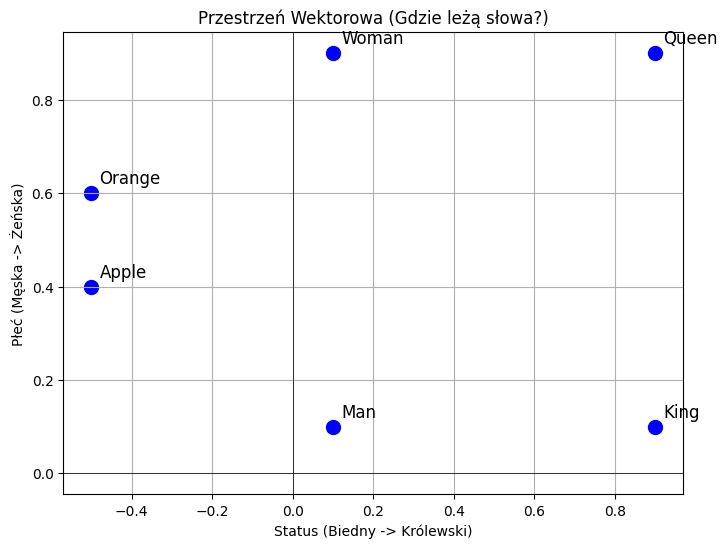

In [2]:
# Rysujemy mapę słów
plt.figure(figsize=(8, 6))
plt.scatter(df['Oś_Statusu'], df['Oś_Płci'], s=100, c='blue')

# Dodajemy podpisy
for word, pos in word_embeddings.items():
    plt.text(pos[0]+0.02, pos[1]+0.02, word, fontsize=12)

plt.title("Przestrzeń Wektorowa (Gdzie leżą słowa?)")
plt.xlabel("Status (Biedny -> Królewski)")
plt.ylabel("Płeć (Męska -> Żeńska)")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

## Matematyka na Słowach (Algebra Liniowa)

To jest najciekawszy moment. Skoro słowa to liczby (współrzędne), to możemy je **dodawać i odejmować**.

Sprawdźmy słynne równanie:
1.  Bierzemy wektor **Króla** (`King`).
2.  Odejmujemy pierwiastek "Męskości" (`Man`).
3.  Dodajemy pierwiastek "Żeńskości" (`Woman`).

Co wyjdzie? Czy komputer "wymyśli" słowo Królowa?

In [3]:
# 1. Wykonujemy operację matematyczną
wynik_wektora = word_embeddings["King"] - word_embeddings["Man"] + word_embeddings["Woman"]

print(f"Wektor wynikowy: {wynik_wektora}")

# 2. Szukamy, jakie słowo leży najbliżej tego wyniku
# (Obliczamy odległość euklidesową od wyniku do wszystkich innych słów)

def find_closest_word(vec):
    min_dist = float('inf')
    best_word = None
    
    for word, features in word_embeddings.items():
        # Pomijamy słowa składowe (żeby nie wyszło nam, że King to King)
        if word in ["King", "Man", "Woman"]:
            continue
            
        # Liczymy dystans
        dist = np.linalg.norm(vec - features)
        
        if dist < min_dist:
            min_dist = dist
            best_word = word
            
    return best_word, min_dist

najblizsze_slowo, dystans = find_closest_word(wynik_wektora)

print("-" * 40)
print(f"Równanie: King - Man + Woman = ???")
print(f"Odpowiedź komputera: {najblizsze_slowo}")
print(f"Dystans (błąd): {dystans}")
print("-" * 40)

if dystans < 0.1:
    print("✅ SUKCES! Matematyka zadziałała idealnie.")
else:
    print("❌ Coś poszło nie tak.")

Wektor wynikowy: [0.9 0.9]
----------------------------------------
Równanie: King - Man + Woman = ???
Odpowiedź komputera: Queen
Dystans (błąd): 0.0
----------------------------------------
✅ SUKCES! Matematyka zadziałała idealnie.


## 🧠 Podsumowanie: Jak myśli ChatGPT?

To, co zrobiliśmy powyżej na 2 wymiarach, ChatGPT robi na **1536 lub więcej wymiarach**.

**Tu jest haczyk.**
Model językowy tak naprawdę nie "wie", co to jest Królowa. On nie ma definicji w encyklopedii.
On po prostu widzi, że w gigantycznej przestrzeni liczb, punkt, który powstaje z przesunięcia `King` o wektor płci, ląduje idealnie w miejscu, gdzie znajduje się etykieta `Queen`.

**Dlaczego to jest ważne dla Ciebie?**
Tak działają bazy wektorowe (Pinecone, Weaviate) i RAG.
1.  Zamieniasz pytanie użytkownika na wektor.
2.  Zamieniasz swoje pliki PDF na wektory.
3.  Komputer szuka, który fragment PDF leży "najbliżej" pytania na mapie (nawet jeśli nie używa tych samych słów!).